# Importing Libraries and Dependencies

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
import random

#import os 
#os.chdir('/Users/chkapsalis/Desktop/my_learning/ACG-Deree/Winter_2023:24/ITC6013-Applied_Machine_Learning/homework/Homework-1-Classification - Advertising /internet+advertisements')

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA 
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
#from mlxtend.plotting import plot_decision_regions


pd.set_option('display.max_columns', 1559)  # as many as the columns in our input dataset
pd.set_option('display.max_info_columns', 25)


import warnings 
warnings.filterwarnings('ignore')


# Importing and Inspecting the data

In [2]:
input_data = pd.read_csv('ad.data', index_col=None, header=None)

input_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

In [3]:
# from inspecting the dataframe overview, I see that the last column ('1558') contains the classification of each image element,
# so it is the class variable - it contains the information we want our models to predict
input_data.iloc[:,1558].value_counts()

1558
nonad.    2820
ad.        459
Name: count, dtype: int64

In [4]:
# I proceed to name the cols so as to make their names more meaningful - denote the type of content they refer to
input_data.columns = ['height', 'width', 'aratio', 'local'] + [f'url{i}' for i in range(1,457+1)] + [f'origurl{i}' for i in range(1,495+1)] + [f'ancurl{i}' for i in range(1,472+1)] + [f'alt{i}' for i in range(1,111+1)] + [f'caption{i}' for i in range(1,19+1)] + ['class']
input_data.head()

,height,width,aratio,local,url1,url2,url3,url4,url5,url6,url7,url8,url9,url10,url11,url12,url13,url14,url15,url16,url17,url18,url19,url20,url21,url22,url23,url24,url25,url26,url27,url28,url29,url30,url31,url32,url33,url34,url35,url36,url37,url38,url39,url40,url41,url42,url43,url44,url45,url46,url47,url48,url49,url50,url51,url52,url53,url54,url55,url56,url57,url58,url59,url60,url61,url62,url63,url64,url65,url66,url67,url68,url69,url70,url71,url72,url73,url74,url75,url76,url77,url78,url79,url80,url81,url82,url83,url84,url85,url86,url87,url88,url89,url90,url91,url92,url93,url94,url95,url96,url97,url98,url99,url100,url101,url102,url103,url104,url105,url106,url107,url108,url109,url110,url111,url112,url113,url114,url115,url116,url117,url118,url119,url120,url121,url122,url123,url124,url125,url126,url127,url128,url129,url130,url131,url132,url133,url134,url135,url136,url137,url138,url139,url140,url141,url142,url143,url144,url145,url146,url147,url148,url149,url150,url151,url152,url153,url154,url155,url156,url157,url158,url159,url160,url161,url162,url163,url164,url165,url166,url167,url168,url169,url170,url171,url172,url173,url174,url175,url176,url177,url178,url179,url180,url181,url182,url183,url184,url185,url186,url187,url188,url189,url190,url191,url192,url193,url194,url195,url196,url197,url198,url199,url200,url201,url202,url203,url204,url205,url206,url207,url208,url209,url210,url211,url212,url213,url214,url215,url216,url217,url218,url219,url220,url221,url222,url223,url224,url225,url226,url227,url228,url229,url230,url231,url232,url233,url234,url235,url236,url237,url238,url239,url240,url241,url242,url243,url244,url245,url246,url247,url248,url249,url250,url251,url252,url253,url254,url255,url256,url257,url258,url259,url260,url261,url262,url263,url264,url265,url266,url267,url268,url269,url270,url271,url272,url273,url274,url275,url276,url277,url278,url279,url280,url281,url282,url283,url284,url285,url286,url287,url288,url289,url290,url291,url292,url293,url294,url295,url296,url297,url298,url299,url300,url301,url302,url303,url304,url305,url306,url307,url308,url309,url310,url311,url312,url313,url314,url315,url316,url317,url318,url319,url320,url321,url322,url323,url324,url325,url326,url327,url328,url329,url330,url331,url332,url333,url334,url335,url336,url337,url338,url339,url340,url341,url342,url343,url344,url345,url346,url347,url348,url349,url350,url351,url352,url353,url354,url355,url356,url357,url358,url359,url360,url361,url362,url363,url364,url365,url366,url367,url368,url369,url370,url371,url372,url373,url374,url375,url376,url377,url378,url379,url380,url381,url382,url383,url384,url385,url386,url387,url388,url389,url390,url391,url392,url393,url394,url395,url396,url397,url398,url399,url400,url401,url402,url403,url404,url405,url406,url407,url408,url409,url410,url411,url412,url413,url414,url415,url416,url417,url418,url419,url420,url421,url422,url423,url424,url425,url426,url427,url428,url429,url430,url431,url432,url433,url434,url435,url436,url437,url438,url439,url440,url441,url442,url443,url444,url445,url446,url447,url448,url449,url450,url451,url452,url453,url454,url455,url456,url457,origurl1,origurl2,origurl3,origurl4,origurl5,origurl6,origurl7,origurl8,origurl9,origurl10,origurl11,origurl12,origurl13,origurl14,origurl15,origurl16,origurl17,origurl18,origurl19,origurl20,origurl21,origurl22,origurl23,origurl24,origurl25,origurl26,origurl27,origurl28,origurl29,origurl30,origurl31,origurl32,origurl33,origurl34,origurl35,origurl36,origurl37,origurl38,origurl39,origurl40,origurl41,origurl42,origurl43,origurl44,origurl45,origurl46,origurl47,origurl48,origurl49,origurl50,origurl51,origurl52,origurl53,origurl54,origurl55,origurl56,origurl57,origurl58,origurl59,origurl60,origurl61,origurl62,origurl63,origurl64,origurl65,origurl66,origurl67,origurl68,origurl69,origurl70,origurl71,origurl72,origurl73,origurl74,origurl75,origurl76,origurl77,origurl78,origurl79,origurl80,origurl81,origurl82,origurl83,origurl84,origurl85,origurl86,origurl87,origurl88,origurl89,o

Inspecting the nature of our dataset's variables - I distinguish between groups of features based on their data type . 

In [5]:
# Integer columns - supposed to convey boolean logic
input_data.select_dtypes(include='int').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3279 entries, 0 to 3278
Columns: 1554 entries, url1 to caption19
dtypes: int64(1554)
memory usage: 38.9 MB


In [6]:
# float columns - the first 3 variables/columns are supposed to be of such nature, but here I see it returns none. So they must have
# been assigned a wrong data type. 
input_data.select_dtypes(include='float').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3279 entries, 0 to 3278
Empty DataFrame


In [7]:
# string columns - the first 4 columns are falsely attributed to this data type, so I will need to change that - I will do it 
# AFTER taking care of replacing the missing values (denoted by '?') with np.nan values (else the .astype('float64') method 
# would raise an exception, since the value "?" cannot be converted to a float number)
input_data.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3279 entries, 0 to 3278
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   height  3279 non-null   object
 1   width   3279 non-null   object
 2   aratio  3279 non-null   object
 3   local   3279 non-null   object
 4   class   3279 non-null   object
dtypes: object(5)
memory usage: 128.2+ KB


In [8]:
# boolean columns - we have none of those, as we were supposed to
input_data.select_dtypes(include='bool').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3279 entries, 0 to 3278
Empty DataFrame


So we also see that there are no features taking string or boolean values. As such, we do not need to implement one hot encoding to this dataset.

In [9]:
# just to make sure I have named the correct columns so as to match the variable groups 
print('Number of "origurl*labyrinth" columns:', input_data.columns.str.contains('origurl').sum())
print('Number of "ancurl*search+direct" columns:', input_data.columns.str.contains('ancurl').sum())
print('Number of "alt*your" columns:', input_data.columns.str.contains('alt').sum())
print('Number of "caption*and" columns:', input_data.columns.str.contains('caption').sum())

Number of "origurl*labyrinth" columns: 495
Number of "ancurl*search+direct" columns: 472
Number of "alt*your" columns: 111
Number of "caption*and" columns: 19


These numbers match those stated in the documentation, so I can safely assumed that the naming of variables has been done correctly - the remaining 457 columns are of the "url*images+buttons" type. 

## Checking for Duplicate Values 
I see there are a lot of duplicates. However, we will not drop them in our case. This is because duplicate values here just reflect reality; they exist in this dataset because it is quite often in websites to see ad images with the exact same characteristics, even the texts on them. For example, we might have a big company with huge advertisement spend so that it may put up advertisements all over the web for people seeing interested in relevant content (for me, as a marketer, I see 'semrush' and 'adobe creative cloud' everywhere). So, in such cases we need to keep duplicates, since the relative frequency in which advertisements of specific characteristic groups exist is important to be able to predict what is actually taking place in reality.

In [10]:
print('Initial Shape of input_data:', input_data.shape)
# Observing the number of duplicate rows in our dataset - two rows will refer to the very same add iff ALL features have the same values:
input_data[input_data.duplicated(subset=None) == True]

# There are a lot of duplicates; it is 784 out of 3279 rows, or 23.91% of them.

Initial Shape of input_data: (3279, 1559)


height width  aratio local  url1  url2  url3  url4  url5  url6  url7  \
14       33   230  6.9696     1     0     0     0     0     0     0     0   
23       90    60  0.6666     1     0     0     0     0     0     0     0   
41       50   107    2.14     0     0     0     0     0     0     0     0   
42       50   107    2.14     0     0     0     0     0     0     0     0   
44      125   125     1.0     1     0     0     0     0     0     0     0   
...     ...   ...     ...   ...   ...   ...   ...   ...   ...   ...   ...   
3268     25   100     4.0     1     0     0     0     0     0     0     0   
3269      ?     ?       ?     1     0     0     0     0     0     0     0   
3270      ?     ?       ?     1     0     0     0     0     0     0     0   
3271      ?     ?       ?     1     0     0     0     0     0     0     0   
3277      ?     ?       ?     1     0     0     0     0     0     0     0   

      url8  url9  url10  url11  url12  url13  url14  url15  url16  url17  \
14       0     0      0      0      0      0      0      0      0      0   
23       0     0      0      0      0      0      0      0      0      0   
41       0     0      0      0      0      0      0      0      0      0   
42       0     0      0      0      0      0      0      0      0      0   
44       0     0      0      0      0      0      0      0      0      0   
...    ...   ...    ...    ...    ...    ...    ...    ...    ...    ...   
3268     0     0      0      0      0      0      0      0      0      0   
3269     0     0      0      0      0      0      0      0      0      0   
3270     0     0      0      0      0      0      0      0      0      0   
3271     0     0      0      0      0      0      0      0      0      0   
3277     0     0      0      0      0      0      0      0      0      0   

      url18  url19  url20  url21  url22  url23  url24  url25  url26  url27  \
14        0      0      0      0      0      0      0      0      0      0   
23        0      0      0      0      0      0      0      0      0      0   
41        0      0      0      0      0      0      0      0      0      0   
42        0      0      0      0      0      0      0      0      0      0   
44        0      0      0      0      0      0      0      0      0      0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
3268      0      0      0      0      0      0      0      0      0      0   
3269      0      0      0      0      0      0      0      0      0      0   
3270      0      0      0      0      0      0      0      0      0      0   
3271      0      0      0      0      0      0      0      0      0      0   
3277      0      0      0      0      0      0      0      0      0      0   

      url28  url29  url30  url31  url32  url33  url34  url35  url36  url37  \
14        0      0      0      0      0      0      0      0      0      0   
23        0      0      0      0      0      0      0      0      0      0   
41        0      0      0      0      0      0      0      0      0      0   
42        0      0      0      0      0      0      0      0      0      0   
44        0      0      0      0      0      0      0      0      0      0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
3268      0      0      0      0      0      0      0      0      0      0   
3269      0      0      0      0      0      0      0      0      1      0   
3270      0      0      0      0      0      0      0      0      0      0   
3271      0      0      0      0      0      0      0      0      0      0   
3277      0      0      0      0      0      0      0      0      1      0   

      url38  url39  url40  url41  url42  url43  url44  url45  url46  url47  \
14        0      0      0      0      0      0      0      0      1      0   
23        0      0      0      0      0      0      0      0      0      0   
41        0      0      0      0      0      0      0      

## Dealing with missing values
Missing values in this dataset are represented by the string value '?'. This is why implementing the .isna() or .isnull() methods of pandas on the raw data will not return any values as being missing, as shown below. This is also shown from the fact that the first three columns (which are known to contain missing values from the documentation) have 3279/3279 non-null values.

Thus, I will first replace '?' values with np.nan values (which is ok since all columns are supposed to be numeric, so there are no columns that could be wrongfully impacted from this procedure). 

In [11]:
# showcasing the lack of conventional NaN values in the raw data
there_are_nans = False 
for col in input_data.columns:
    if input_data[col].isna().sum() != 0:
        print('There are', input_data[col].isna().sum(), 'NaN values in column', col)
        if there_are_nans == False: 
            there_are_nans = True 
if there_are_nans == False: print('There are no values typically recognized as NaN values in this dataset.') 

There are no values typically recognized as NaN values in this dataset.


In [12]:
# replacing '?' values with np.nan values 
input_data.replace(to_replace ='[ ]*\?', value = np.nan, regex = True, inplace=True)
for col in input_data.columns:
    if input_data[col].isna().sum() != 0:
        print(f'There are {input_data[col].isna().sum()} NaN values in column "{col}", or {input_data[col].isna().sum()/input_data[col].shape[0]:.2%} of its values.')


There are 903 NaN values in column "height", or 27.54% of its values.
There are 901 NaN values in column "width", or 27.48% of its values.
There are 910 NaN values in column "aratio", or 27.75% of its values.
There are 15 NaN values in column "local", or 0.46% of its values.


So we see that there are missing values in the dataset, but only in the first four columns, with none of the dummy variables containing any NaNs. 

For the float columns ('height', 'width', 'aratio'), I will not use the common practice of imputing missing values with the corresponding columns' median, because that is a constant value and as a result we would heavily distort the distribution of values along each column. I will instead impute them will random values taken from the known values of the training set's corresponding columns.

For 'local' (dummy variable), we will impute them with the mode/most frequent value of in the training set's corresponding columns. 

I do not forget a crucial point here; I need to also split the dataset into a training a test set first, so as to train the imputers (later the scalers, pca, estimators, etc.) on the training set and fit them on the test set! 

Before doing this, however, I am also going to check for potential imbalances present in the class variable, so as to take that into account (by performing stratification) when splitting the original dataset AND (by performing stratified k-fold cross-validation) when training ML models on the training data. 

In [13]:
# Seeing what kind of values the 'local' column takes

input_data['local'].unique()

array(['1', '0', nan, 1, 0], dtype=object)

In [14]:
# input_data['local'].value_counts()  # to make sure the conversion worked out right

In [15]:
# I see it takes both integer AND string values resembling the same fact (either local ('1', 1) or not ('0', 0)), so I need to 
# turn string values into numeric values as well, keeping the nans as they are - this is necessary anyway, because having an array 
# of dtype='object' into the simple imputer could cause unexpected behavior
input_data['local'] = pd.to_numeric(input_data['local'])
input_data['local'].unique()

array([ 1.,  0., nan])

In [16]:
# input_data['local'].value_counts()  # the # of occurrences for 1. values is the same as the sum of 1 and '1' values in the 
# column's initial form

In [17]:
# Converting the first 3 columns into float type columns
input_data[['height', 'width', 'aratio']] = input_data[['height', 'width', 'aratio']].astype('float64')
#input_data['local'][input_data['local'].notnull()==True] = input_data['local'][input_data['local'].notnull()==True].astype('int64')
# input_data['local'].convert_dtypes()

# creating the input matrix and the class variable's vector 
X = input_data.drop('class', axis=1)
y = input_data['class']

# sanity check; they should have the same number of rows, X should have 1558 columns (according to the dataset's documentation),
# and y should have 1 column 
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X: (3279, 1558)
Shape of y: (3279,)


## Pre-Processing on the Dependent Variable 
We see that it takes string values - we need to encode it numerically. We will implement sklearn's LabelEncoder. 

Prior to performing the encoding of the dependent variable, we will also inspect the distribution of class values to check for potential imbalances. 

In [18]:
le = LabelEncoder()
y = pd.DataFrame(le.fit_transform(y), columns=['class'])

print('Absolute counts of class values:', y.value_counts())
print('\n')
print('Relative counts of class values:', y.value_counts(normalize=True))

# I observe a significant imbalance in the distribution of the dependent variable's values, which I will need to address
# when splitting the dataset (by stratifying) and also when training the various classifiers later on (stratified k-fold cv)! 


Absolute counts of class values: class
1        2820
0         459
Name: count, dtype: int64


Relative counts of class values: class
1        0.860018
0        0.139982
Name: proportion, dtype: float64


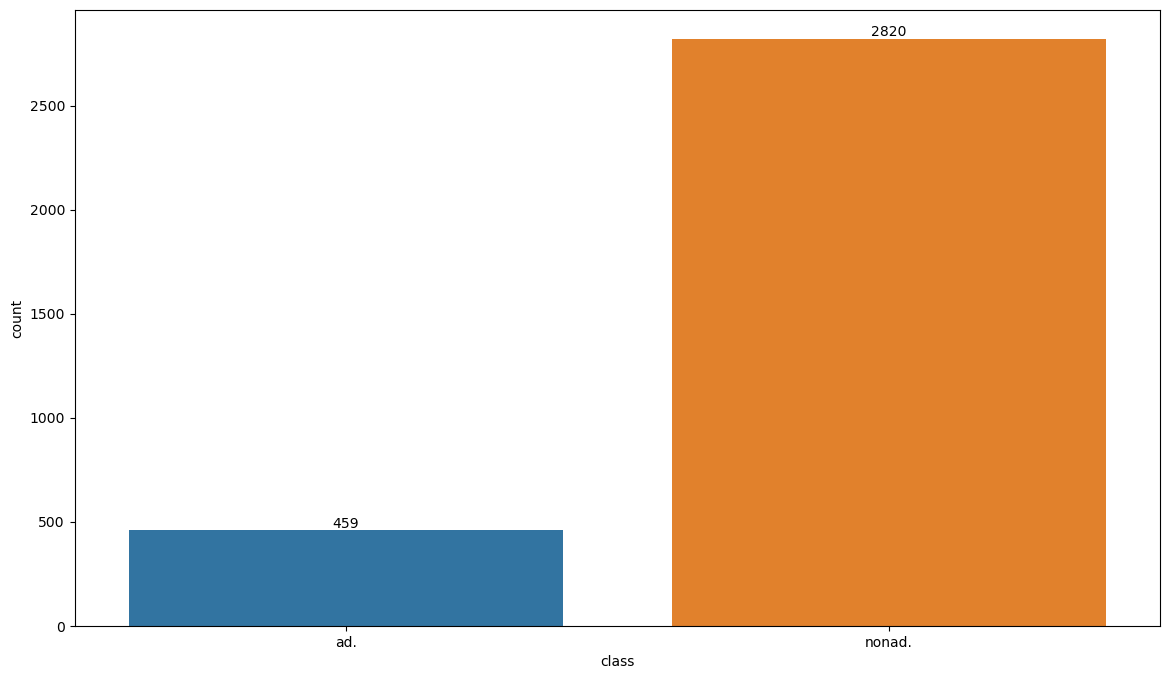

In [19]:
# visualizing the previous results 
fig, ax = plt.subplots(figsize=(14,8))
ax = sns.countplot(data=input_data, x='class')
ax.bar_label(container=ax.containers[0], labels=y.value_counts(ascending=True))
plt.show()

In [20]:
# Splitting the original dataset  - I stratify based on y due to the significant imbalance that exists between the classes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify=y)  # stratify=y makes sure 
# that y_train and y_test contain values from the two classes in (approx.) the same proportions as the initial 'y' column

# Sanity check: 'X_...' dfs should have the same number of cols as the total X df
print('Shape of X_train', X_train.shape)
print('Shape of X_test', X_test.shape)
print('Shape of y_train', y_train.shape)
print('Shape of y_test', y_test.shape)


Shape of X_train (2295, 1558)
Shape of X_test (984, 1558)
Shape of y_train (2295, 1)
Shape of y_test (984, 1)


In [21]:
# making sure my data are actually stratified; y_train & y_test's values do have approximately the same 
# proportions of each class as y, so no problem has occurred
print('Value counts for y_train: \n', y_train.value_counts(normalize=True), '\n'*2)
print('Value counts for y_test: \n', y_test.value_counts(normalize=True))

Value counts for y_train: 
 class
1        0.860131
0        0.139869
Name: proportion, dtype: float64 


Value counts for y_test: 
 class
1        0.859756
0        0.140244
Name: proportion, dtype: float64


In [22]:
# Imputing missing values; I will observe which columns of X_train and X_test contain missing values. If I had extra unclassified/
# unknown data I would like to make predictions on, I would do the same for them as well. 

print('Missing values per X_train column that contains NaNs:')
for col in X_train.columns:
    if X_train[col].isna().sum() != 0:
        print(f'"{col}" contains {X_train[col].isna().sum()} missing values.')

print('\n\n\nMissing values per X_test column that contains NaNs:')
for col in X_test.columns:
    if X_test[col].isna().sum() != 0:
        print(f'"{col}" contains {X_test[col].isna().sum()} missing values.')

Missing values per X_train column that contains NaNs:
"height" contains 639 missing values.
"width" contains 636 missing values.
"aratio" contains 644 missing values.
"local" contains 10 missing values.



Missing values per X_test column that contains NaNs:
"height" contains 264 missing values.
"width" contains 265 missing values.
"aratio" contains 266 missing values.
"local" contains 5 missing values.


Here so it happens that both X_train and X_test have NaNs on the same column. If that wasn't the case, however, I would train all imputers on X_train's columns, even if some of them I use do not contain any missing values.  

In [23]:
# Imputing the missing values in the 'local' column (which contains string values for now)
simputer_categ = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
# Reshape and transform the 'local' column in X_train
X_train['local'] = simputer_categ.fit_transform(np.array(X_train['local']).reshape(-1, 1))

# Reshape and transform the 'local' column in X_test
X_test['local'] = simputer_categ.transform(np.array(X_test['local']).reshape(-1, 1))

# Converting the 'local' columns to integer ones so as to be uniform with the rest of dummy variables 
X_train['local'] = X_train['local'].astype('int64')
X_test['local'] = X_test['local'].astype('int64')

In [24]:
# Imputing the missing values of the continuous columns 

# Simple imputation using a constant value as the column's median could generally be ok, but in this case we have too many values missing
# in each of these 3 columns (almost 28% of values of each are missing), so the columns' variance would get highly distorted this way. 

# To prevent this, we will impute using random values drawn from the non-null values of those columns, in a way that the sample data 
# reflect the statistics/distribution of the original data. 

# these are the -initially- known/non-null values of X_train
scaler_training_data = list()
cont_cols = ['height', 'width', 'aratio']  # the names of cols that this imputation approach refers to
for col in cont_cols:
    scaler_training_data.append(X_train[col][X_train[col].isna() == False].values)
# so I will do the same as fit_transform an imputer on training data and only fitting it on testing data
    
def randomiseMissingData(df_with_continuous_cols, continuous_cols):
    "randomise missing data for DataFrame (within a column) based on the distribution of known values in the corresponding col of the training set"
    for i in range(len(continuous_cols)):
        data = df_with_continuous_cols[continuous_cols[i]] 
        nulls_in_current_df = data.isnull()
        samples = random.choices(scaler_training_data[i], k = nulls_in_current_df.sum())
        df_with_continuous_cols[continuous_cols[i]][nulls_in_current_df] = samples

    return df_with_continuous_cols

X_train[['height', 'width', 'aratio']] = randomiseMissingData(X_train[cont_cols], cont_cols)
X_test[['height', 'width', 'aratio']] = randomiseMissingData(X_test[cont_cols], cont_cols)


In [25]:
# Sanity check: there should be no missing values in the 4 previous columns in X_train (neither in X_test):
for col in ['local','height', 'width', 'aratio']:
    print(f'"{col}" in X_train contains {X_train[col].isna().sum()} missing values.')

"local" in X_train contains 0 missing values.
"height" in X_train contains 0 missing values.
"width" in X_train contains 0 missing values.
"aratio" in X_train contains 0 missing values.


#### Checking the level of sparsity in our data
I do this before scaling the columns, so as to catch the percentage of values equal to zeros in the various columns. 
I will only count as sparse columns with extremely high percentages of zero values, above 99%. 

In [26]:
sparse_cols = 0 
for col in X_train.columns:
    sparsity = X_train[col][X_train[col] == 0.0].shape[0] / X_train[col].shape[0]
    if sparsity > 0.99:
        sparse_cols += 1 
print(sparse_cols)

1340


1340 out of 1558 (excluding the class variable since we're talking about X_train) are sparse. This is probably driven by the fact that 1555 out of 1558 cols (w/ the only exceptions being the first 3 columns) are dummy variables, and it should prompt us to perform dimensionality reduction even though no significance correlation might exist between the columns.

### Checking if feature scaling is needed
This is done through visually checking the ranges of numerical variables.

We will use a boxplot for this case. 

In [27]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2295 entries, 2379 to 1540
Columns: 1558 entries, height to caption19
dtypes: float64(3), int64(1555)
memory usage: 27.3 MB


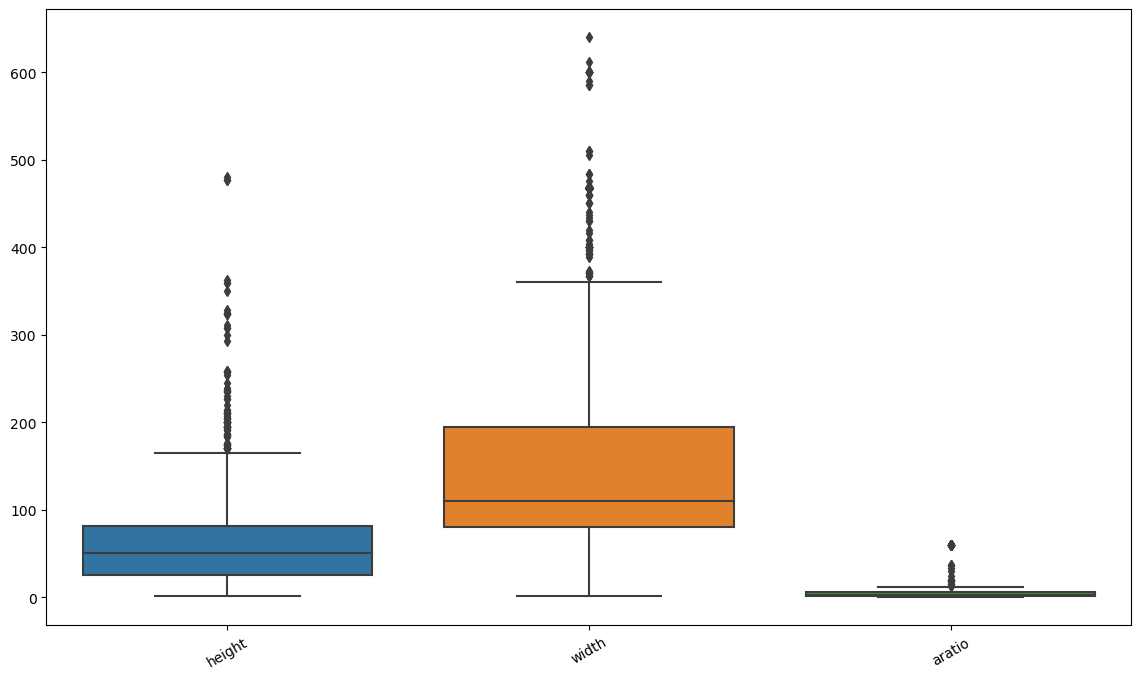

In [28]:
# Since we have all (meaning thousands of) our features are of numeric types now, I will only inspect the value distributions of those 
# that are of inherent numeric nature, as the rest take just 0 and 1 values and their ranges can't differ. However, the scaling 
# is performed on all of them. Scaling, however, is applied to ALL features, since all of them are numeric and we want their mean and 
# standard deviations to be uniform (in Standard Scaling which we will implement here).
float_vars = X_train.select_dtypes(include='float')
fig, ax = plt.subplots(figsize=(14,8))
ax = sns.boxplot(data=float_vars)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.show()

I see that the ranges of variables are different, so I will use sklearn's StandardScaler to fix this in order to prevent the models later trained from considering features with larger ranges (as 'width' here) as contributing more to an image constituting an ad.

By drawing histograms I also see that the distributions of variables are rather skewed (suggesting that we should not use this scaler), and from boxplots we also see that there are multiple outlier values (which make data in their current form incompatible to both the StandardScaler and the MinMaxScaler), but this issue is <strong><u>out of the scope of this assignment</u></strong>.

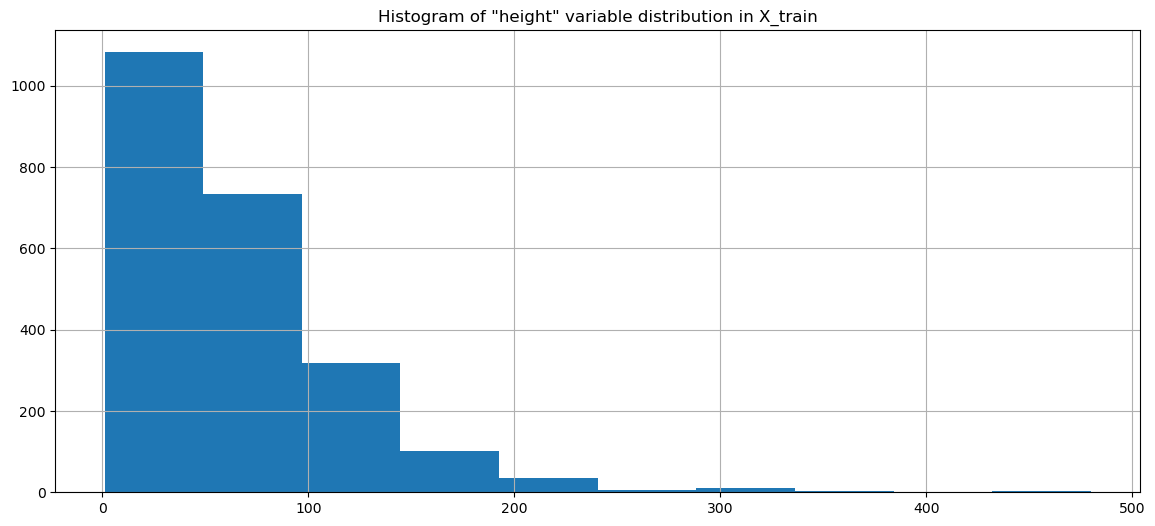

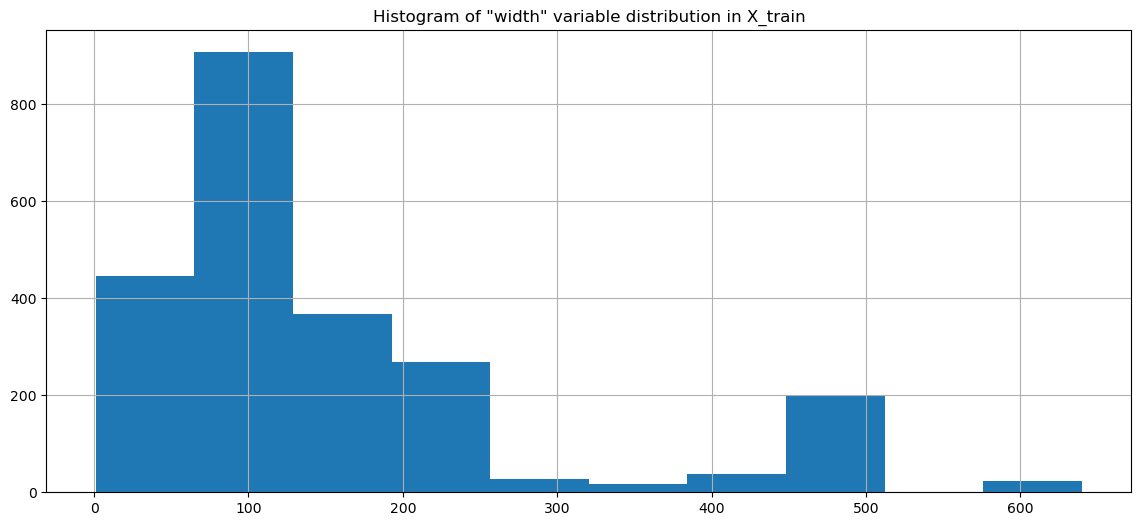

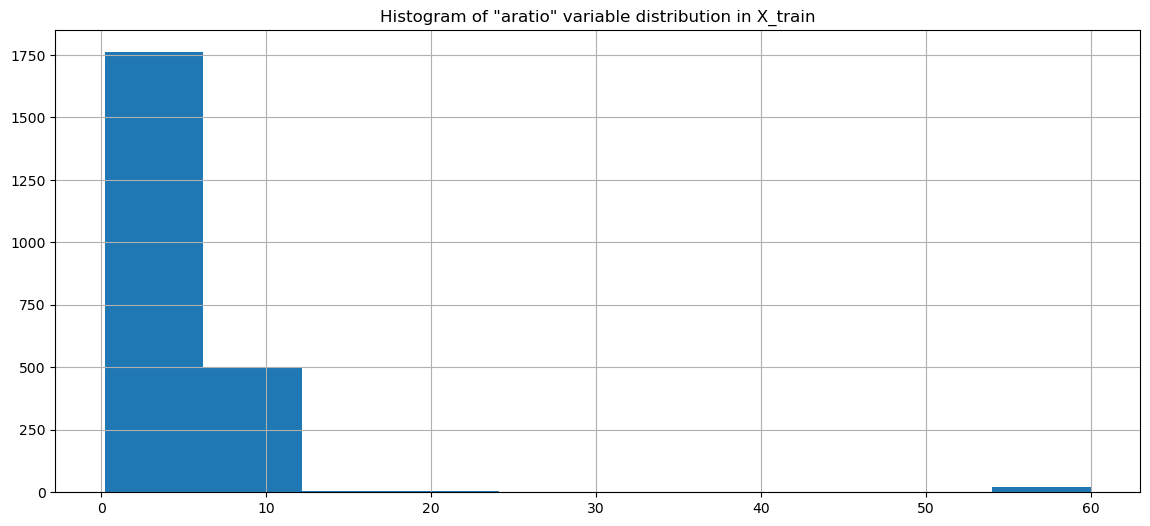

In [29]:
for i in ['height','width','aratio']:
    fig, ax = plt.subplots(figsize=(14,6))
    ax = X_train[i].hist()
    ax.set_title(f'Histogram of "{i}" variable distribution in X_train')
    plt.show()

In [30]:
# I perform scaling on all features, since all of them are (strictly due to the requirements of sklearn's ML models) numeric
# and so the ranges of all need to be similar to prevent problems. 
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns, index=X_test.index)

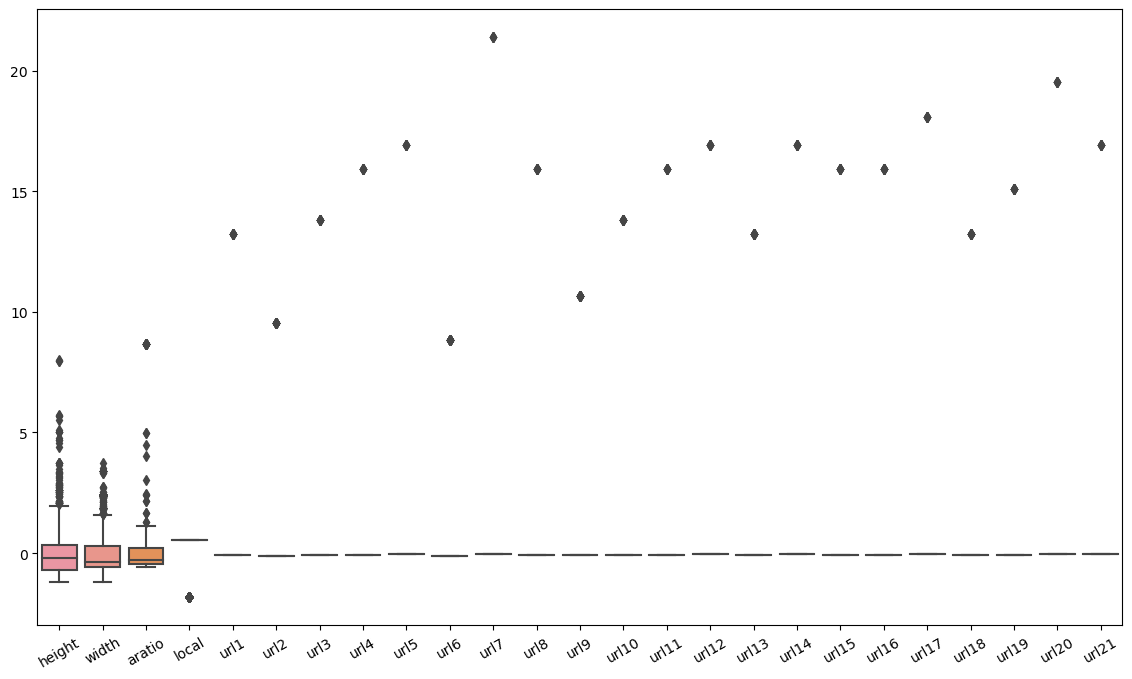

In [31]:
# To make sure the ranges of all columns are the same now, with mean = 0 and std = 1:
fig, ax = plt.subplots(figsize=(14,8))
ax = sns.boxplot(data=X_train.iloc[:,:25])
#ax = sns.boxplot(data=X_train.iloc[:,0:3])
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.show()

In [32]:
# Sanity check: 
X_train[['width','height','aratio']].describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))  # suppressing scientific notation

# we see that all three have mean=0 and standard deviation=1

,width,height,aratio
count,2295.000000,2295.000000,2295.000000
mean,-0.000000,0.000000,-0.000000
std,1.000218,1.000218,1.000218
min,-1.190971,-1.184437,-0.597268
25%,-0.582597,-0.724076,-0.469105
50%,-0.351569,-0.225350,-0.297852
75%,0.295310,0.350102,0.223096
max,3.729929,8.003620,8.657100


### Checking the correlations between features to assess if dimensionality reduction is needed

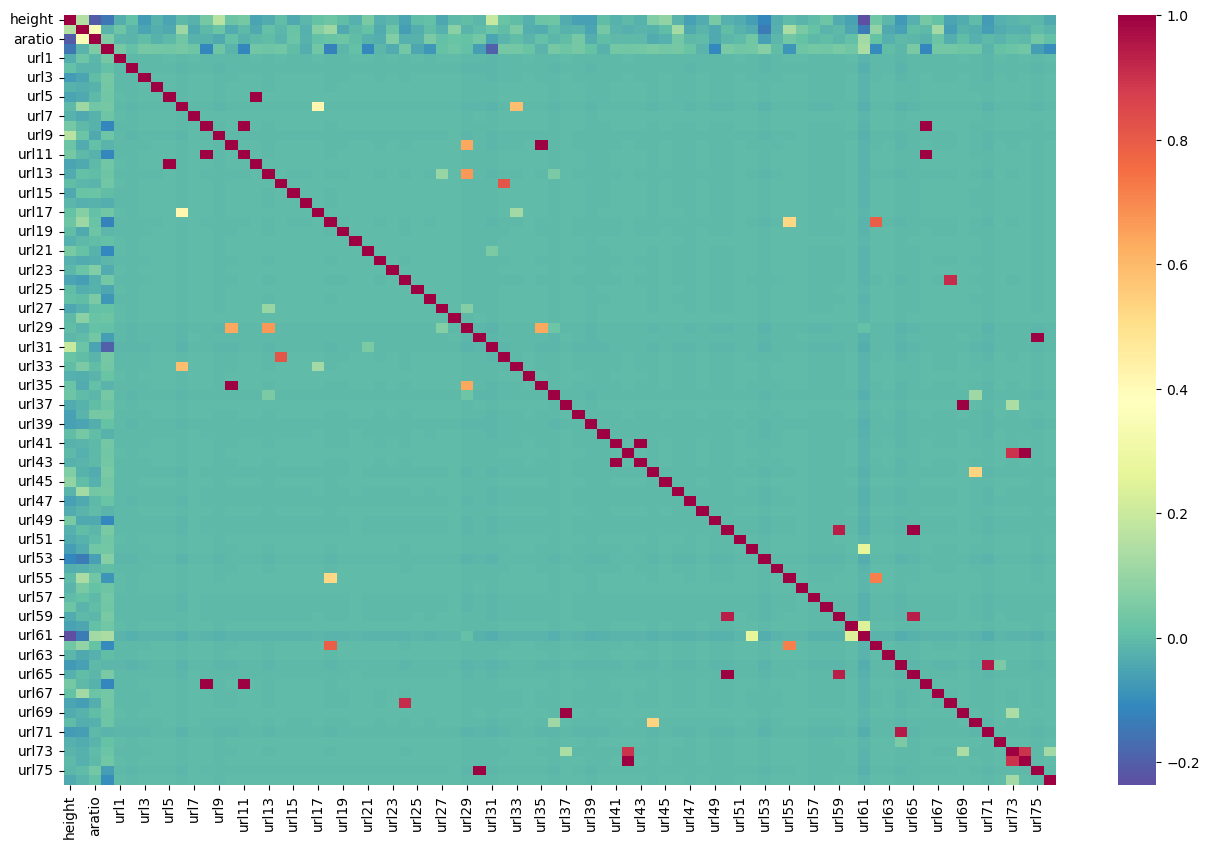

In [33]:
# I show what happens with the first 80 variables included in our dataset.
corr_matrix = X_train.iloc[:,:80].corr()
fig, ax = plt.subplots(figsize=(16,10))
ax = sns.heatmap(data=corr_matrix, cmap="Spectral_r" )
plt.show()


We see that there is some correlation between some of the variables considered, and that correlation is stronger (towards both directions) in some cases, even though that is relatively rare. However, our data are very sparse (1555 out of 1558 features are dummy variables) so we will indeed perform dimensionality reduction by applying the PCA technique. 

In [40]:
pca = PCA(0.95)  # when i use the explained variance argument, I will not immediately create DataFrames and assign them specific column names, 
# because I don't know the number of columns in them prior - I will need to do it immediately after that
PCs = [f'PC{i}' for i in range(1, len(X_train.columns)+1)]
X_train_scores = pca.fit_transform(X_train)
X_test_scores = pca.transform(X_test)

In [41]:
print('New Shape:',X_train_scores.shape)

New Shape: (2295, 291)


So we see that with just 291 features out of the 1558 of them we can explain 95% of variance in the data. 

In [42]:
PCs = [f'PC{i}' for i in range(1, 291+1)]
X_train_scores = pd.DataFrame(X_train_scores, columns=PCs)
X_test_scores = pd.DataFrame(X_test_scores, columns=PCs)

In [43]:
# Explained and Cumulative Variance

exp_var = [i * 100 for i in pca.explained_variance_ratio_]
cum_var = np.cumsum(pca.explained_variance_ratio_ * 100)
pca_var = pd.DataFrame({'exp_var': exp_var, 'cum_var': cum_var})
pca_var.head(295)

# We see that only with 291 out of 1558 features we can explain 95% of the variance in our given dataset. 

,exp_var,cum_var
0,2.305676,2.305676
1,1.849592,4.155269
2,1.718606,5.873875
3,1.533941,7.407816
4,1.512058,8.919874
...,...,...
286,0.044641,94.826969
287,0.044537,94.871506
288,0.043771,94.915277
289,0.043312,94.958588


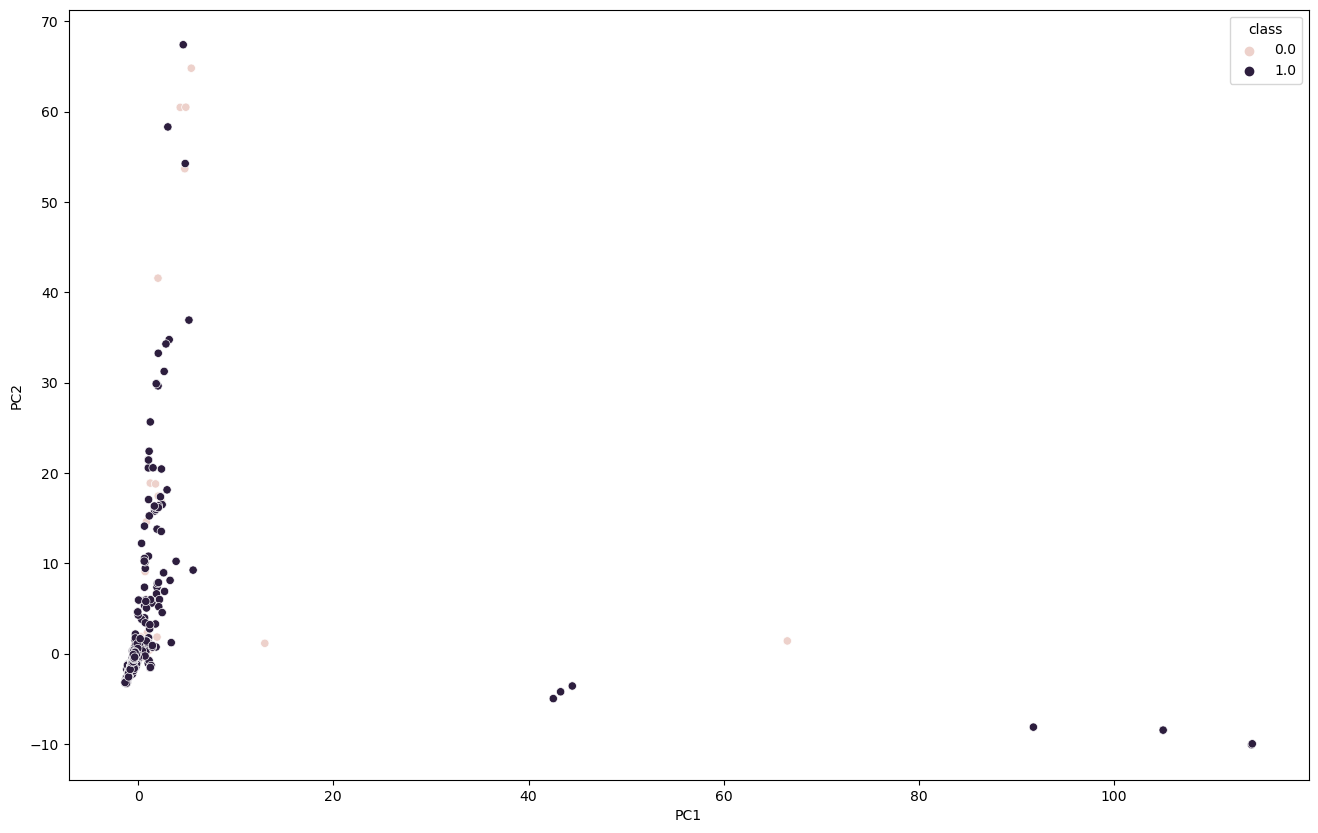

In [42]:
X_train_scores_indicative = X_train_scores.join(y_train)
fig, ax = plt.subplots(figsize=(16,10))
ax = sns.scatterplot(data=X_train_scores_indicative, x='PC1', y='PC2', hue='class')
plt.show()

# not a clean distinction between classes because the first two principal components explain < 6% of the variance in the given data

# Training the KNN, DT, RF, and SVM Classifiers with the default parameters

Using python's sklearn, the default parameters for each classifier are the following: 
- KNN -> <u>KNeighborsClassifier</u>: n_neighbors = 5, weights = 'uniform', distance = 'minkowski' which with p=2 (power parameter for the minowski metric) is equivalent to the 'euclidian' distance, 'score' = accuracy in the knn case (and in classification in general).

- DT -> <u>DecisionTreeClassifier</u>: criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None

- RF -> <u>RandomForestClassifier</u>: criterion='gini', splitter='best', max_depth=None, ... (same as in DecisionTreeClassifier), PLUS n_estimators=100

- SVM -> <u>SVC</u>: C=1.0, kernel='rbf', degree=3, gamma='scale' = 1 / (n_features * X.var()), <strong>class_weight=None</strong>

In [44]:
# Instantiating the Classifiers
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=0)
dt = DecisionTreeClassifier(random_state=0)
svm = SVC(random_state=0)

# Training/fitting them on the pre-processed training set AFTER dimensionality reduction
knn.fit(X_train_scores.values, y_train.values.ravel())
rf.fit(X_train_scores.values, y_train.values.ravel())
dt.fit(X_train_scores.values, y_train.values.ravel())
svm.fit(X_train_scores.values, y_train.values.ravel())

# Making Predictions on the test set
y_pred_knn = knn.predict(X_test_scores.values)
y_pred_dt = dt.predict(X_test_scores.values)
y_pred_rf = rf.predict(X_test_scores.values)
y_pred_svm = svm.predict(X_test_scores.values)

## Evaluating the performance of the classifiers based on (macro) performance metrics

We base our evaluation on macro averages because we have seen that there exist significant imbalances between the classes. As such, the weighted averages will tend to obscure the classification errors on the minority class, through the higher weights applied on the scores for the majority class.

#### - KNN Classifier

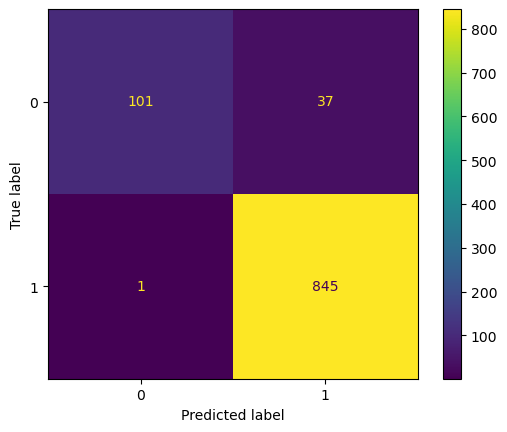

In [45]:
# Confusion Matrix - '1' and '0' values represent the 'nonad' and 'ad' classes, respectively
cm_knn = confusion_matrix(y_test, y_pred_knn, labels=knn.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=knn.classes_)
disp.plot()

In [46]:
print(metrics.classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.99      0.73      0.84       138
           1       0.96      1.00      0.98       846

    accuracy                           0.96       984
   macro avg       0.97      0.87      0.91       984
weighted avg       0.96      0.96      0.96       984



Looking at the metrics for the minority class ('ad'): We see that 98% of the 'ad' predictions it gave were correct, and it caught 68% of 'ad' cases in y_test.

Looking at the macro avg metrics, 96% of predictions it gave were correct on average for samples among both classes, and it got 84% of the actual cases of the various classes (on average).

#### - DT Classifier

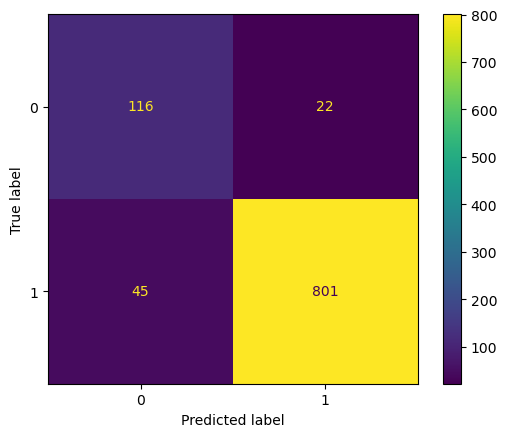

In [47]:
# Confusion Matrix - '1' and '0' values represent the 'nonad' and 'ad' classes, respectively
cm_dt = confusion_matrix(y_test, y_pred_dt, labels=dt.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=dt.classes_)
disp.plot()

In [48]:
print(metrics.classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.72      0.84      0.78       138
           1       0.97      0.95      0.96       846

    accuracy                           0.93       984
   macro avg       0.85      0.89      0.87       984
weighted avg       0.94      0.93      0.93       984



Looking at the metrics for the minority class ('ad'): We see that 63% of the 'ad' predictions it gave were correct, and it caught 85% of 'ad' cases in y_test. Thus, it was more keen (compared to the knn) on classifying test data samples as belonging to the minority class, so it also made more misclassifications on samples from the majority class. Yet it still didn't catch 22% of samples in the minority class. 

Looking at the macro avg metrics, we have a decrease in precision due to the significant decrease in minority class precision, which was way larger than the increase in precision for the majority class. 

Regarding recall, its increase in the minority class (it got a much higher percentage of actual 'ad' samples compared to KNN) was much bigger than its decrease in the majority class (which was due to its higher keenness on classifying samples as belonging to the minority class), so that its macro average increased. 

The harmonized mean of the two previous metrics, i.e. the f1 score (macro avg), got a lower value because macro precision dropped relatively more than how much macro recall increased, so we can say that overall the DT classifier did a worse job than the KNN classifier in this very example. (We judge on this based on F1 because we're working with a database containing severe class imbalances; as a result, 'accuracy' would give misleading results that cannot be trusted for comparisons between models, as the misclassifications on minority class samples, which are severely underrepresented, would get obscured.)

#### - RF Classifier

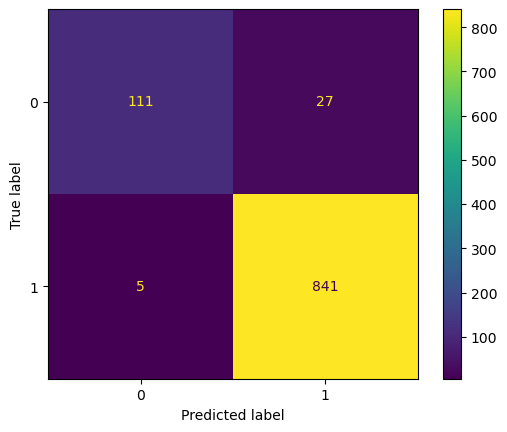

In [49]:
# Confusion Matrix - '1' and '0' values represent the 'nonad' and 'ad' classes, respectively
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=rf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf.classes_)
disp.plot()

In [50]:
print(metrics.classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.80      0.87       138
           1       0.97      0.99      0.98       846

    accuracy                           0.97       984
   macro avg       0.96      0.90      0.93       984
weighted avg       0.97      0.97      0.97       984



Regarding the minority class, it captured 2% more of the total actual 'ad' cases in y_test compared to the Decision Tree, and it also made way less false 'ad' classifications. At the same time it got 99% of the majority class' cases, without being overly keen in classifying its samples as 'ads' like the DT classifier did, so it was more precise in its 'nonad' classifications as well.

Overall, both macro recall and precision went up and thus so did f1-score, with the latter fact indicating the better performance of the random forest classifier against a single decision tree with the same parameter values (here: the default ones). 

#### - SVM Classifier

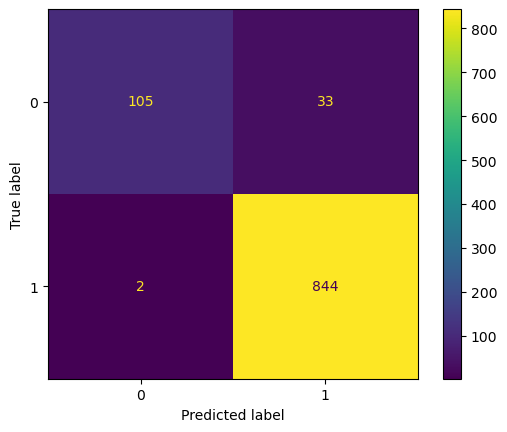

In [51]:
# Confusion Matrix - '1' and '0' values represent the 'nonad' and 'ad' classes, respectively
cm_svm = confusion_matrix(y_test, y_pred_svm, labels=svm.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm.classes_)
disp.plot()

In [52]:
print(metrics.classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.98      0.76      0.86       138
           1       0.96      1.00      0.98       846

    accuracy                           0.96       984
   macro avg       0.97      0.88      0.92       984
weighted avg       0.97      0.96      0.96       984



Even though it again managed to catch all actual cases of 'nonad' samples, it was slightly worse in giving 'ad' predictions and only better at capturing the 'nonad' cases by a miniscule percentage. As a result, (macro) precision increased a bit, and recall decreased, so that the macro f1-score was approximately the same. (Actually, recall's drop was relatively less than precision's increase, so that macro f1-score is slightly higher for the SVM). 

<strong>Overall in our example</strong>, the Random Forest classifier is the winner out of all classifiers under their default parameter values in sklearn, judging by the f1-score which is the most trustworthy performance metric to make comparisons when significant class imbalances exist. 

## Tuning the Hyperparameters of each Model and Observing how Performance Changes

#### - KNN classifier

In [ ]:
# Stratified k-fold cross validation of the KNN model, GridSearchCV

# Cross evaluation with multiple metrics - ignoring accuracy due to the high class imbalances we have in our dataset 
params_grid = {'n_neighbors': np.arange(1,101,5), 
               'metric': ['euclidean'], 
               'weights': ['uniform', 'distance']}

gridCV_knn =GridSearchCV(estimator=KNeighborsClassifier(), 
                param_grid = params_grid, 
                cv = 10, # inserting an integer in the classification case ensures that stratified k-fold cross validation takes place 
                n_jobs = -1,
                scoring = ['precision_macro','recall_macro','f1_macro','accuracy'],
                refit='accuracy'    #f1-score is the best performance metric to consider when making comparisons between various models
                # under cases of high class imbalances and you want to talk about how successful they are in making predictions for each class. 
                # However, since y_test contains a set number of samples belonging to each class,
                # then still the best estimator when fitting a specific model will be the one with max accuracy.
)

gridCV_knn.fit(X_train_scores.values, y_train.values.ravel())

In [75]:
print(gridCV_knn.best_params_)

{'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'distance'}


I will show how changing the value of n_neighbors affects other metrics, with the values of the rest of the model's parameters being equal to those included in the best_estimator_.

In [76]:
temp = pd.DataFrame(gridCV_knn.cv_results_, columns=gridCV_knn.cv_results_.keys())

In [79]:
results_knn = temp[['param_n_neighbors', 'mean_test_precision_macro', 'mean_test_recall_macro', 'mean_test_f1_macro']][(temp['param_weights']=='distance')]

In [80]:
results_knn

,param_n_neighbors,mean_test_precision_macro,mean_test_recall_macro,mean_test_f1_macro
1,1,0.917077,0.888590,0.901096
3,6,0.958269,0.860345,0.899595
5,11,0.961724,0.836454,0.884018
7,16,0.961904,0.813618,0.866538
9,21,0.961457,0.795217,0.851634
11,26,0.961181,0.776862,0.835256
13,31,0.956888,0.751957,0.810766
15,36,0.956210,0.732039,0.791279
17,41,0.954031,0.721149,0.779425
19,46,0.950716,0.704056,0.759955


In [81]:
def plot_metric_evolution(df_results, name_of_model, name_of_basic_metric):
    fig, ax = plt.subplots(figsize=(12, 6))  # Slightly larger figure for better spacing

    hor_axis_vals = np.linspace(0, 100, df_results.shape[0])  # to prevent making the plot looking too crowded, 
    # I only show every 10th value as an xtick (major ticks), and I vertical lines for every 2nd 'params' value (minor ticks)
    ax.plot(hor_axis_vals, df_results['mean_test_precision_macro'], label='Macro Precision')
    ax.plot(hor_axis_vals, df_results['mean_test_recall_macro'], label='Macro Recall')
    ax.plot(hor_axis_vals, df_results['mean_test_f1_macro'], label='F1 Macro')

    # Set limits, labels, and title
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 1)
    ax.set_xlabel(name_of_basic_metric)
    ax.set_title(f"Performance metrics on the default {name_of_model} model for different {name_of_basic_metric} values", fontsize=12)
    ax.legend()

    ax.set_xticks(np.arange(0, 101, 10))
    ax.set_xticks(np.arange(0, 101, 2), minor=True)

    # Rotating the ticks of the horizontal axis to boost readability, and drawing the vertical lines on each minor tick
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
    ax.xaxis.grid(which='minor', linestyle='--', alpha=0.5)

    plt.show()

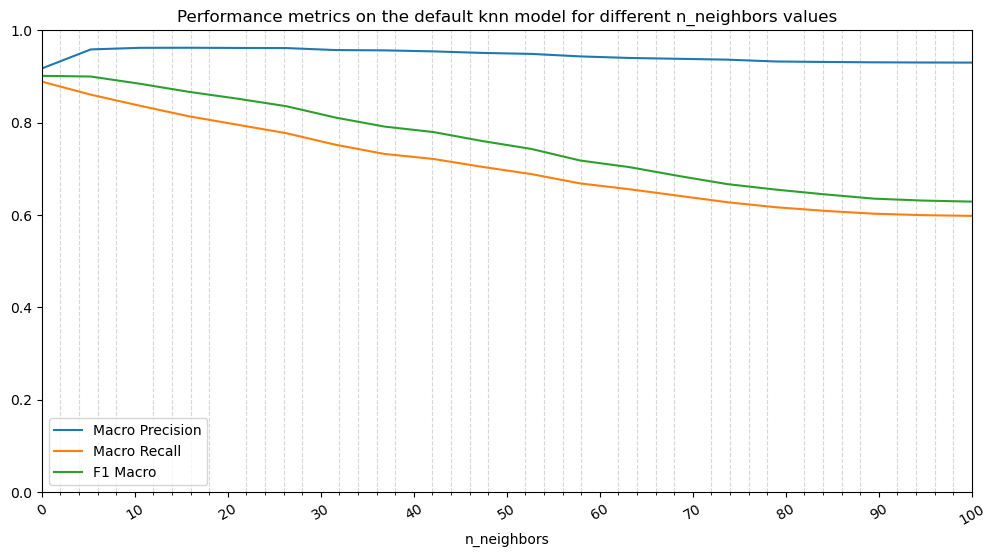

In [82]:
plot_metric_evolution(results_knn, 'knn', 'n_neighbors')

Our data show very high imbalances. As a result, increasing n_neighbors initially gives the model a boost in avoiding false negatives, but at the expense of the more populated majority class (i.e. while increasing false positives). This increases macro precision due to the improvement in correctly classifying more minority samples as minority ones, but reduces recall due to the increased misclassifications in the majority class. As n_neighbors continues to increase, then the voting may take into account extreme values - outliers in the features set have not been taken care of, and which could be linked to 'ad' samples. As a result, the further increasing of n_neighbors harms overall impact.

In [147]:
# Fitting the best knn estimator and inspecting the performance change compared to the default model.
knn_opt = gridCV_knn.best_estimator_
knn_opt.fit(X_train_scores.values, y_train.values.ravel())
y_pred_knn_opt = knn_opt.predict(X_test_scores.values)

print(metrics.classification_report(y_test, y_pred_knn_opt))

              precision    recall  f1-score   support

           0       0.98      0.75      0.85       138
           1       0.96      1.00      0.98       846

    accuracy                           0.96       984
   macro avg       0.97      0.87      0.91       984
weighted avg       0.96      0.96      0.96       984



Rounded to 2 decimals, the (macro) f1 and accuracy scores for the optimal decision tree estimator were the exact same as for the default one. This has to do with the fact that it happened in the dataset we're working with so that the optimal parameters are pretty close to the default ones set by sklearn. 

In [83]:
# Stratified k-fold cross validation of the DT model, GridSearchCV

# Dictionary of model hyperparameters; we will only consider different values for the n_neighbors ('k') parameter
param_grid = {'max_depth': list(np.arange(1, 50, 2)) + [None]#,  
          #    'max_features' : ['sqrt', 'log2', None], 
          #    'min_samples_split': [1, 3, 5, 10], 
          #    'min_samples_leaf': [1, 3, 10],
          #    'criterion': ['gini', 'entropy']
             }  # to fine-tune the model, i am asked to inspect the effect that the size of the tree has on ff1, precision, recall -> 
# that will be the only parameter I try multiple values for, I leave the others equal to their default values.

# I will perform 10-fold cross-validation 
gridCV_dt = RandomizedSearchCV(estimator = DecisionTreeClassifier(random_state=0), 
                            n_iter=500,
                        param_distributions = param_grid,
                        cv=10,
                        scoring = ['precision_macro','recall_macro','f1_macro','accuracy'], 
                        n_jobs=-1,
                        refit='accuracy')  


gridCV_dt.fit(X_train_scores.values, y_train.values.ravel())



RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
                   n_iter=500, n_jobs=-1,
                   param_distributions={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15,
                                                      17, 19, 21, 23, 25, 27,
                                                      29, 31, 33, 35, 37, 39,
                                                      41, 43, 45, 47, 49,
                                                      None]},
                   refit='accuracy',
                   scoring=['precision_macro', 'recall_macro', 'f1_macro',
                            'accuracy'])

In [86]:
print(gridCV_dt.best_params_)

{'max_depth': 5}


In [88]:
res = pd.DataFrame(gridCV_dt.cv_results_, columns=gridCV_dt.cv_results_.keys())
results_rf = res[['param_max_depth','mean_test_precision_macro', 'mean_test_recall_macro', 'mean_test_f1_macro']]

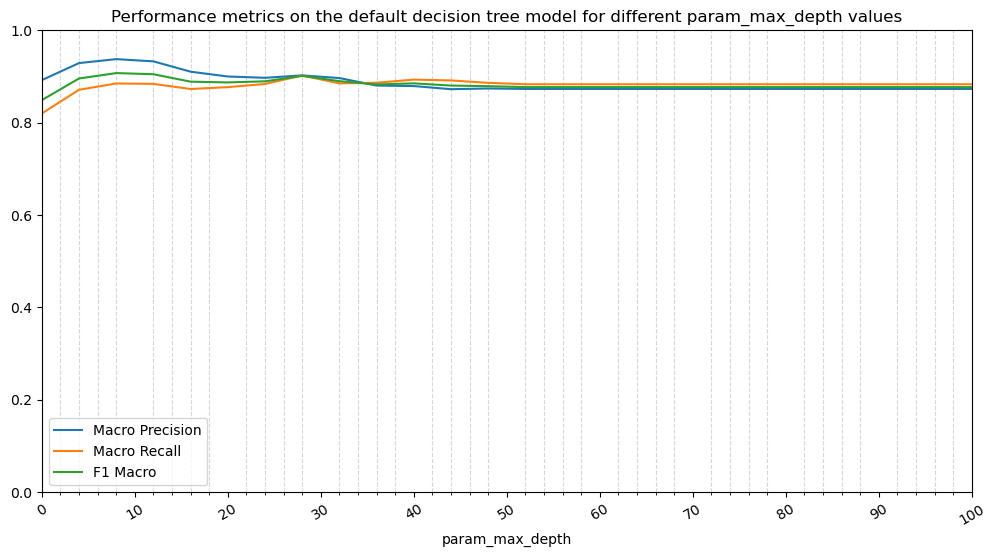

In [89]:
plot_metric_evolution(results_rf, 'decision tree', 'param_max_depth')

We observe an initial increase in performance as measured by all three metrics shown, due to the fact that the deeper the tree gets the better it manages to extract the signal in our data, aka to recognize any meaningful relationships between features sets and class values. However, after a certain length, overfitting occurs and there is a drop in generalization performance.

In [151]:
# Fitting the best dt estimator and inspecting the performance change compared to the default model.

dt_opt = gridCV_dt.best_estimator_
dt_opt.fit(X_train_scores.values, y_train.values.ravel())
y_pred_dt_opt = dt_opt.predict(X_test_scores.values)

print(metrics.classification_report(y_test, y_pred_dt_opt))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       138
           1       0.97      0.98      0.97       846

    accuracy                           0.95       984
   macro avg       0.91      0.90      0.90       984
weighted avg       0.95      0.95      0.95       984



Significant improvement across all performance metrics compared to the default DT estimator. 

In [ ]:
# Stratified k-fold cross validation of the rf model, GridSearchCV

# Dictionary of model hyperparameters; we will only consider different values for the n_neighbors ('k') parameter
param_grid = {#'n_estimators': np.arange(10, 200, 10),
              'max_depth': list(np.arange(1, 50, 2)) + [None],  
        #      'max_features' : ['sqrt', 'log2', None], 
        #      'min_samples_split': [1, 3, 5, 10], 
        #      'min_samples_leaf': [1, 3, 10],
              'criterion': ['gini']
             }  # to fine-tune the model, i am asked to inspect the effect that the size of the tree has on f1, precision, recall -> 
# that will be the only parameter I try multiple values for. I add here the 'criterion' with just one value, so as to return that 
# column in cv_results_ and be able to use it for pivoting and plotting.

# I will perform 5-fold cross-validation (and not 10-fold for speed reasons)
gridCV_rf = RandomizedSearchCV(estimator = RandomForestClassifier(random_state=0), 
                            n_iter=250,
                          param_distributions = param_grid,
                          cv=5,
                          scoring= ['precision_macro','recall_macro','f1_macro','accuracy'], 
                          n_jobs=-1,
                          refit='accuracy')  

gridCV_rf.fit(X_train_scores.values, y_train.values.ravel())



In [100]:
# Printing the optimal value for the n_neighbors parameter
#print("Best parameters: n_neighbors=", gridCV.best_params_['n_neighbors'])
print(gridCV_rf.best_params_)
res = pd.DataFrame(gridCV_rf.cv_results_, columns=gridCV_rf.cv_results_.keys())


{'max_depth': 25, 'criterion': 'gini'}


In [102]:
rf_f1_macro = res.pivot_table(index='param_max_depth', columns='param_criterion', values='mean_test_f1_macro')

In [103]:
rf_f1_macro.columns=['mean_test_f1_macro']

In [104]:
rf_prec = res.pivot_table(index='param_max_depth', columns='param_criterion', values='mean_test_precision_macro')

In [105]:
rf_prec.columns=['mean_test_precision_macro']

In [106]:
rf_recall = res.pivot_table(index='param_max_depth', columns='param_criterion', values='mean_test_recall_macro')

In [107]:
rf_recall.columns=['mean_test_recall_macro']

In [108]:
rf_metrics = rf_recall.join(rf_prec).join(rf_f1_macro)

In [109]:
rf_metrics.reset_index(inplace=True)

In [110]:
rf_metrics

,param_max_depth,mean_test_recall_macro,mean_test_precision_macro,mean_test_f1_macro
0,1,0.521345,0.801708,0.503954
1,3,0.753580,0.957412,0.814391
2,5,0.834518,0.970029,0.884906
3,7,0.867711,0.967433,0.908542
4,9,0.879958,0.967551,0.916903
5,11,0.884115,0.965187,0.918561
6,13,0.898660,0.971070,0.930181
7,15,0.897924,0.965367,0.927452
8,17,0.903414,0.961650,0.929054
9,19,0.907825,0.961006,0.931508


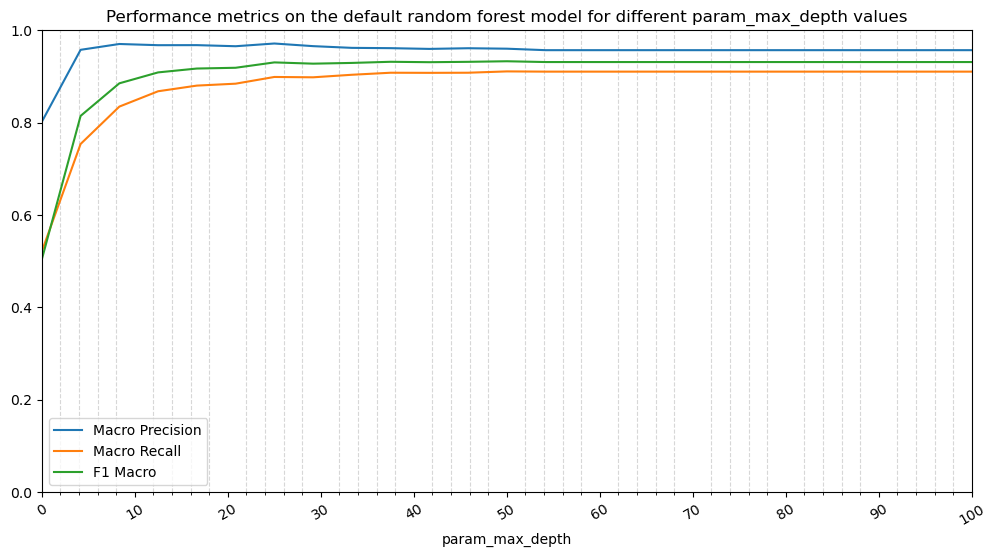

In [111]:
plot_metric_evolution(rf_metrics, 'random forest', 'param_max_depth')

Same movements as in the decision tree case occur, however even smoother because overfiting is prevented, and performance is always better compared to a single decision tree with the same parameters. 

In [152]:
# Fitting the best rf estimator and inspecting the performance change compared to the default model.

rf_opt = gridCV_dt.best_estimator_
rf_opt.fit(X_train_scores.values, y_train.values.ravel())
y_pred_rf_opt = rf_opt.predict(X_test_scores.values)

print(metrics.classification_report(y_test, y_pred_rf_opt))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       138
           1       0.97      0.98      0.97       846

    accuracy                           0.95       984
   macro avg       0.91      0.90      0.90       984
weighted avg       0.95      0.95      0.95       984



Because randomized search cv was used instead of exhaustive search, no improvement happened to be recorded compared to the optimal rf - what we would get from grid search cv would be that it would bear better performance than both the default rf as well as the optimal dt. 

In [ ]:
# Stratified k-fold cross validation of the svm model, GridSearchCV

# Finding the optimal SVM classifier - I make sure that, in my parameter values grid, C and gamma values are spaced exponentially 
# between them, as this is the recommended practice
C_range = np.logspace(-2,10,13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = [ {'C':C_range, 'kernel':['linear'], 'class_weight': [None, 'balanced']},
               {'C':C_range, 'kernel':['rbf'], 'gamma':gamma_range, 'class_weight': [None, 'balanced']},
               {'C':C_range, 'kernel':['poly'],'degree': [2,3,4] ,'gamma':gamma_range, 'class_weight': [None, 'balanced']} 
             ]  # here I am asked to check what happens on different value sets for various hyperparameters

gridCV_svm = RandomizedSearchCV(estimator=SVC(random_state=0),
                        param_distributions=param_grid,
                        n_iter=150,
                        n_jobs=-1,
                        cv=5,
                        scoring = ['precision_macro','recall_macro','f1_macro','accuracy'],
                        refit='accuracy')

gridCV_svm.fit(X_train_scores.values, y_train.values.ravel())


In [114]:
print(gridCV_svm.best_params_) 
res = pd.DataFrame(gridCV_svm.cv_results_, columns=gridCV_svm.cv_results_.keys())

{'kernel': 'rbf', 'gamma': 1e-08, 'class_weight': None, 'C': 1000000.0}


In [118]:
results_svm_rbf = res[['param_C','param_gamma','mean_test_precision_macro', 'mean_test_recall_macro', 'mean_test_f1_macro']][(res['param_kernel']=='rbf') & (res['param_class_weight']!='balanced')]

In [117]:
results_svm_linear = res[['param_C','param_gamma','mean_test_precision_macro', 'mean_test_recall_macro', 'mean_test_f1_macro']][(res['param_kernel']=='linear') & (res['param_class_weight']!='balanced')]

In [119]:
results_svm_poly = res[['param_C','param_gamma','mean_test_precision_macro', 'mean_test_recall_macro', 'mean_test_f1_macro']][(res['param_kernel']=='poly') & (res['param_class_weight']!='balanced')]

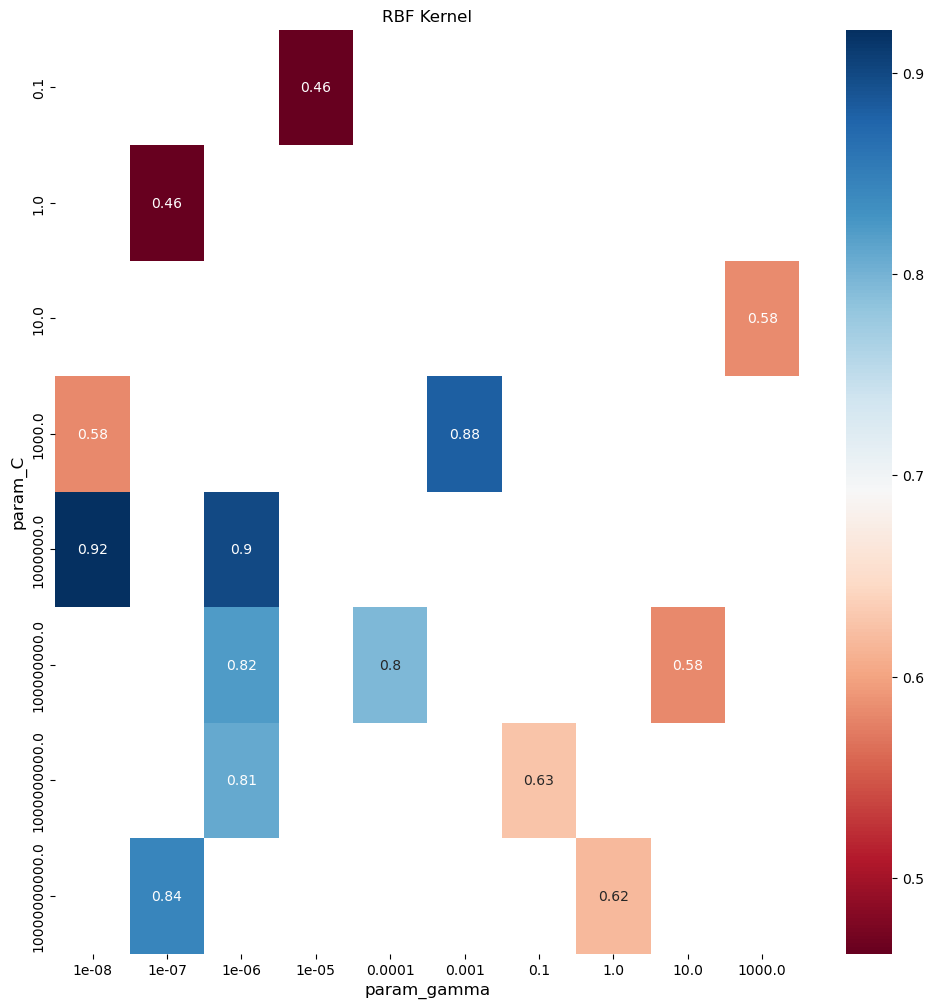

In [138]:
hm_data_rbf = results_svm_rbf.pivot_table(index='param_C', columns='param_gamma', values='mean_test_f1_macro')

# Plot heatmap
fig, ax1 = plt.subplots(figsize=(12,12))
ax1.set_title('RBF Kernel')
ax1.set_ylabel('C Parameter', fontsize=12)
ax1.set_xlabel('Gamma Parameter', fontsize=12)

ax1 = sns.heatmap(hm_data_rbf,
                 annot=True,
                 cmap='RdBu',
                 linecolor='white')


plt.show()

Maximization occurs under lower gamma values (i.e. lower number of support vectors taken into account to determine the hyperplane) and higher C values (i.e. higher penalty for samples allowed to be misclassified to boost generalization performance).

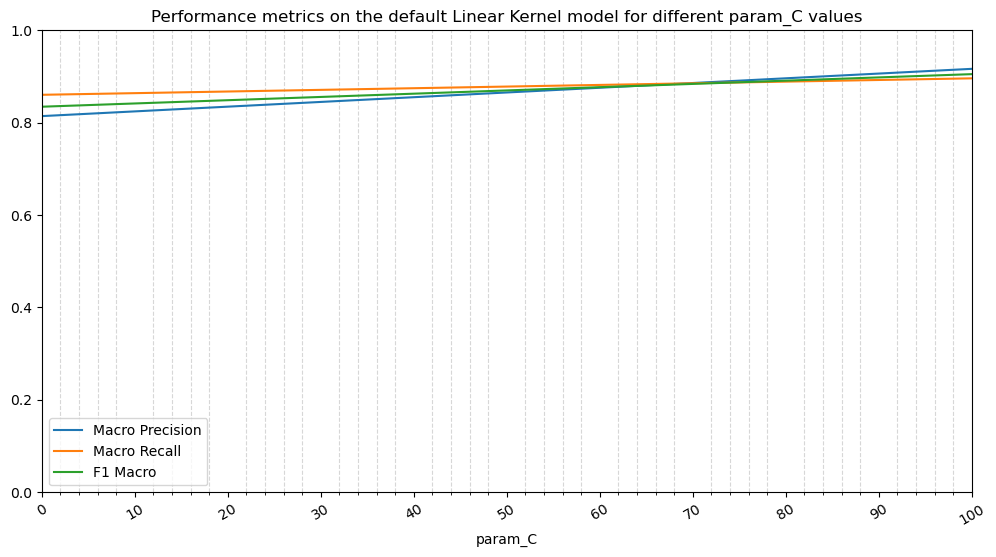

In [142]:
plot_metric_evolution(results_svm_linear, 'Linear Kernel', 'param_C')

In this example where there are a lot of outliers that haven't been taken care of, increasing C (at least up to 100) increases performance as it is measured by all metrics, because it makes the model consider those less when drawing the hyperplane. As a result, overfitting is prevented, and generalization performance is safeguarded.

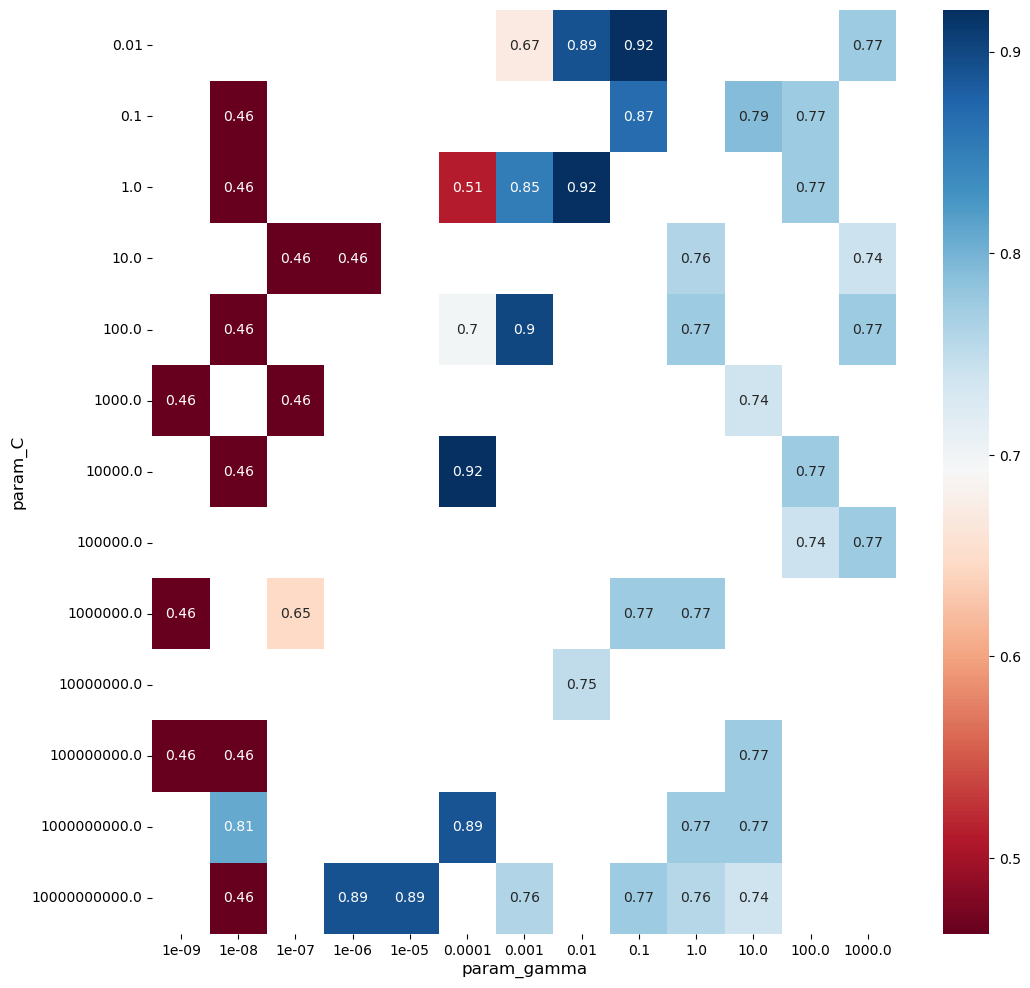

In [137]:
hm_data_poly = results_svm_poly.pivot_table(index='param_C', columns='param_gamma', values='mean_test_f1_macro')


fig, ax3 = plt.subplots(figsize=(12,12))
ax3.set_ylabel('C Parameter', fontsize=12)
ax3.set_xlabel('Gamma Parameter', fontsize=12)
ax3.set_title('Poly Kernel', fontsize=12)
ax3 = sns.heatmap(hm_data_poly,
                 annot=True,
                 cmap='RdBu',
                 linecolor='white')
plt.show()


For very low gamma values, no matter the C value we set, we get a model very bad at generalizing, because it takes into account too many support vectors. For very high gamma values, the model showcases medium performance on the available data, because it is susceptible to overfitting. Maximization becomes possible for medium values of gamma; in that range of gamma values, the lower the gamma (and with it the lower the no of support vectors) then the higher the C needed to increase performance, so as to make sure that the model does not get severely influenced by the available noise & outliers in the available data.

In [155]:
# Fitting the best svm estimator and inspecting the performance change compared to the default model.
svm_opt = gridCV_svm.best_estimator_
svm_opt.fit(X_train_scores.values, y_train.values.ravel())
y_pred_svm_opt = svm_opt.predict(X_test_scores.values)
print(metrics.classification_report(y_test, y_pred_svm_opt))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86       138
           1       0.97      0.99      0.98       846

    accuracy                           0.96       984
   macro avg       0.95      0.90      0.92       984
weighted avg       0.96      0.96      0.96       984



Slight decrease in precision and increase in recall that culminated in the same f1-score, while it also bears the same overall accuracy as the default model. Gave more false positives and less false negatives than the default svm estimator. Now we have a much higher C parameter value, which results in less misclassifications being allowed in the training phase, so the boundary constructed is much more complex. As a result, it gets influenced by areas in which there is a higher density of minority class samples (possibly among outlier values which have not been dropped or handled), so that it manages to catch those better, but that also makes it fail more often at classifying cases of the majority class.

In [157]:
# get support vectors
svs = pd.DataFrame(svm_opt.support_vectors_, index=range(1,svm_opt.support_vectors_.shape[0]+1), columns=list(X_train_scores.columns))
svs.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,PC112,PC113,PC114,PC115,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125,PC126,PC127,PC128,PC129,PC130,PC131,PC132,PC133,PC134,PC135,PC136,PC137,PC138,PC139,PC140,PC141,PC142,PC143,PC144,PC145,PC146,PC147,PC148,PC149,PC150,PC151,PC152,PC153,PC154,PC155,PC156,PC157,PC158,PC159,PC160,PC161,PC162,PC163,PC164,PC165,PC166,PC167,PC168,PC169,PC170,PC171,PC172,PC173,PC174,PC175,PC176,PC177,PC178,PC179,PC180,PC181,PC182,PC183,PC184,PC185,PC186,PC187,PC188,PC189,PC190,PC191,PC192,PC193,PC194,PC195,PC196,PC197,PC198,PC199,PC200,PC201,PC202,PC203,PC204,PC205,PC206,PC207,PC208,PC209,PC210,PC211,PC212,PC213,PC214,PC215,PC216,PC217,PC218,PC219,PC220,PC221,PC222,PC223,PC224,PC225,PC226,PC227,PC228,PC229,PC230,PC231,PC232,PC233,PC234,PC235,PC236,PC237,PC238,PC239,PC240,PC241,PC242,PC243,PC244,PC245,PC246,PC247,PC248,PC249,PC250,PC251,PC252,PC253,PC254,PC255,PC256,PC257,PC258,PC259,PC260,PC261,PC262,PC263,PC264,PC265,PC266,PC267,PC268,PC269,PC270,PC271,PC272,PC273,PC274,PC275,PC276,PC277,PC278,PC279,PC280,PC281,PC282,PC283,PC284,PC285,PC286,PC287,PC288,PC289,PC290,PC291
1,0.383654,-0.416547,-0.215420,-0.143640,-0.166112,-0.067074,0.023152,-0.956813,-0.397210,-0.392538,0.187354,-0.288570,-0.168446,-0.131608,-0.079959,-0.023206,-0.077532,0.104296,0.690805,-0.555878,-0.199505,-0.252448,0.072268,0.033789,-0.530761,-0.328784,-0.338792,-0.276597,0.087726,-0.116316,0.222633,0.046855,0.344459,-0.207268,-0.214601,-0.320381,-0.302005,-0.017487,0.161368,-0.152086,-0.620474,0.076656,0.048051,-0.463011,-0.523743,-0.223668,-0.531667,-0.076235,0.055404,1.177143,0.279683,-0.014524,-0.138500,-0.517152,0.777585,0.272716,-0.132525,-0.058756,-0.406462,0.066002,-0.592993,-0.039434,-0.356442,0.601634,-1.082812,-0.766356,0.218092,0.228323,-0.485048,-0.394998,0.264450,-0.010395,-0.287861,0.308172,0.126640,-0.715827,-0.278180,-0.218690,-0.304569,0.009392,0.740473,-0.354307,-0.385378,2.127610,0.022970,-1.231226,2.164156,0.031748,-0.656579,0.080968,0.713003,1.006671,1.204283,0.534178,-0.390462,-0.640295,0.840196,-0.726278,-0.451573,0.310447,0.220694,0.324899,0.272883,-0.452517,-1.227755,1.119291,0.145957,-0.104217,-0.085339,-0.630673,0.686250,-0.321063,0.878108,1.034530,0.707475,-1.441088,1.648908,0.633307,-0.291576,1.127635,0.739440,0.563135,2.451530,0.180051,-1.725418,-2.359175,5.461567,-2.583867,-0.896626,0.371407,0.402277,-0.872469,-0.315208,-0.586888,0.959548,0.931088,1.260153,1.646760,-0.270819,-0.889063,1.364578,0.344839,-1.966793,0.955366,0.530790,0.620205,-1.277824,0.620179,-2.582594,0.798590,-1.916138,-3.434659,-1.754450,0.611177,3.036944,-2.304913,-4.367758,1.904207,6.304798,-2.317901,-0.598972,1.034177,4.123258,-1.454577,-3.480821,-0.754131,0.402497,0.132423,1.166186,-0.660584,-0.903809,1.081255,0.303392,-1.227443,-0.151541,0.408541,-0.144710,-2.119717,-1.859350,-0.787187,0.184546,-1.421902,-1.324914,-1.255486,0.468067,-1.805545,-1.979209,0.053313,1.644607,-0.670011,-3.674020,-4.972860,-1.758033,-1.446089,1.030024,2.607890,1.156136,1.327033,-1.606859,1.205915,0.604521,-3.904110,-0.726760,1.867730,-0.370640,-0.869690,-2.466032,1.162752,0.784477,1.435559,-0.428906,-0.415622,0.697964,0.725895,0.703062,0.833576,-0.829270,-0.604100,-0.389546,-0.421951,0.579986,-0.999145,-0.293304,-0.560013,1.729192,-1.527803,-1.107477,0.405458,0.605883,-0.404454,-0.491577,-1.383711,-0.934880,0.943968,0.717711,-0.436451,0.356231,-0.319080,-1.031905,0.471494,0.910692,0.862805,-0.352833,-0.084286,-0.449633,-0.130240,-0.28336

In [158]:
print('Number of support vectors in the optimal svm model:', svs.shape[0])

Number of support vectors in the optimal svm model: 253
